# Data Version Comparison

This notebook compares two versions of the 2PCFs for data loa-v1.1 and loa-v2. The version is for catalog, not spectra.

We compare the data format for HOD fitting.

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
colors = ["#1b1b1b", "#0072B2", "#D55E00", "#009E73", "#CC79A7", "#E69F00", "#56B4E9", "#F0E442", "#000000"]
idxwp=np.arange(6,21)
idxxi=np.arange(11,21)
rpbins=np.geomspace(0.01,100,25)
rpbinsmid=(rpbins[1:]+rpbins[:-1])/2
rp_wp=rpbinsmid[idxwp]
s_xi=rpbinsmid[idxxi]

ctypes=['wp','xi0','xi2']
y0labels=[r'$r_{\rm p} w_{\rm p}$',r'$s \xi_{0}$',r'$s \xi_{2}$']
y1labels=[r'$\Delta w_{\rm p}/w_{\rm p}^{\rm obs}$',r'$\Delta \xi_{0}/\xi_{0}^{\rm obs}$',r'$\Delta \xi_{2}/\xi_{2}^{\rm obs}$']
xlabels=[r'$r_{\rm p}$',r'$s$',r'$s$']

In [6]:
def load_data(tracer, zmin, zmax, version='v1.1'):
    ddir=f'../data/for_hod/{version}_rp6s11/'
    path=ddir+f'wp_{tracer}_{zmin}_{zmax}_cut.dat'
    data=np.loadtxt(path)
    wp=data[:,1]
    wp_err=data[:,2]
    path=ddir+f'xi02_{tracer}_{zmin}_{zmax}_cut.dat'
    data=np.loadtxt(path)
    xi0=data[:,1]
    xi0err=data[:,2]
    xi2=data[:,3]
    xi2err=data[:,4]
    obs={'wp':wp,'xi0':xi0,'xi2':xi2}
    err={'wp':wp_err,'xi0':xi0err,'xi2':xi2err}
    return obs, err

In [7]:
def compare_versions(tracer, zmin, zmax):
    obs_v1, err_v1 = load_data(tracer, zmin, zmax, version='v1.1')
    obs_v2, err_v2 = load_data(tracer, zmin, zmax, version='v2')
    
    obs_all = [obs_v1, obs_v2]
    err_all = [err_v1, err_v2]
    labels = ['loa-v1.1', 'loa-v2']
    
    ## Plotting
    fig, axs = plt.subplots(2,3,constrained_layout=True,sharex='col',figsize=(24,8),gridspec_kw={'height_ratios': [3, 1]})
    for i,ctype in enumerate(ctypes):
        if ctype=='wp':
            x=rp_wp
        else:
            x=s_xi
        for obs, err, color, label in zip(obs_all, err_all, colors, labels):
            axs[0,i].errorbar(x, x*obs[ctype], yerr=x*err[ctype], 
                        marker='o', ls='', markerfacecolor='none',
                        markeredgecolor=color, ecolor=color,
                        label=label)
            # make the band hollow: no face fill, only an outline
            axs[1,i].fill_between(x, (-err[ctype]) / obs[ctype], (err[ctype]) / obs[ctype],
                facecolor='none', edgecolor=color, linewidth=1.5, alpha=1.0)
        
        axs[0,i].set_xscale('log')
        axs[1,i].set_xscale('log')
        axs[0,i].set_ylabel(y0labels[i],fontsize=20)
        axs[1,i].set_ylabel(y1labels[i],fontsize=20)
        axs[0,i].grid(linestyle='--')
        axs[1,i].grid(linestyle='--')        
        axs[0,i].tick_params(labelsize=20)
        axs[1,i].tick_params(labelsize=20)        
        axs[1,i].set_xlabel(xlabels[i],fontsize=20)
        axs[1,i].plot(x,np.zeros_like(x),ls='-.',color='black')    
    # axs[1,1].set_ylim(-0.5,0.5)
    if max(abs(err_v1['xi2']/obs_v1['xi2']))>1 or max(abs(err_v2['xi2']/obs_v2['xi2']))>1:
        axs[1,2].set_ylim(-1,1)
    axs[0,0].legend(frameon=False,fontsize=20,loc=4)

## LRGs

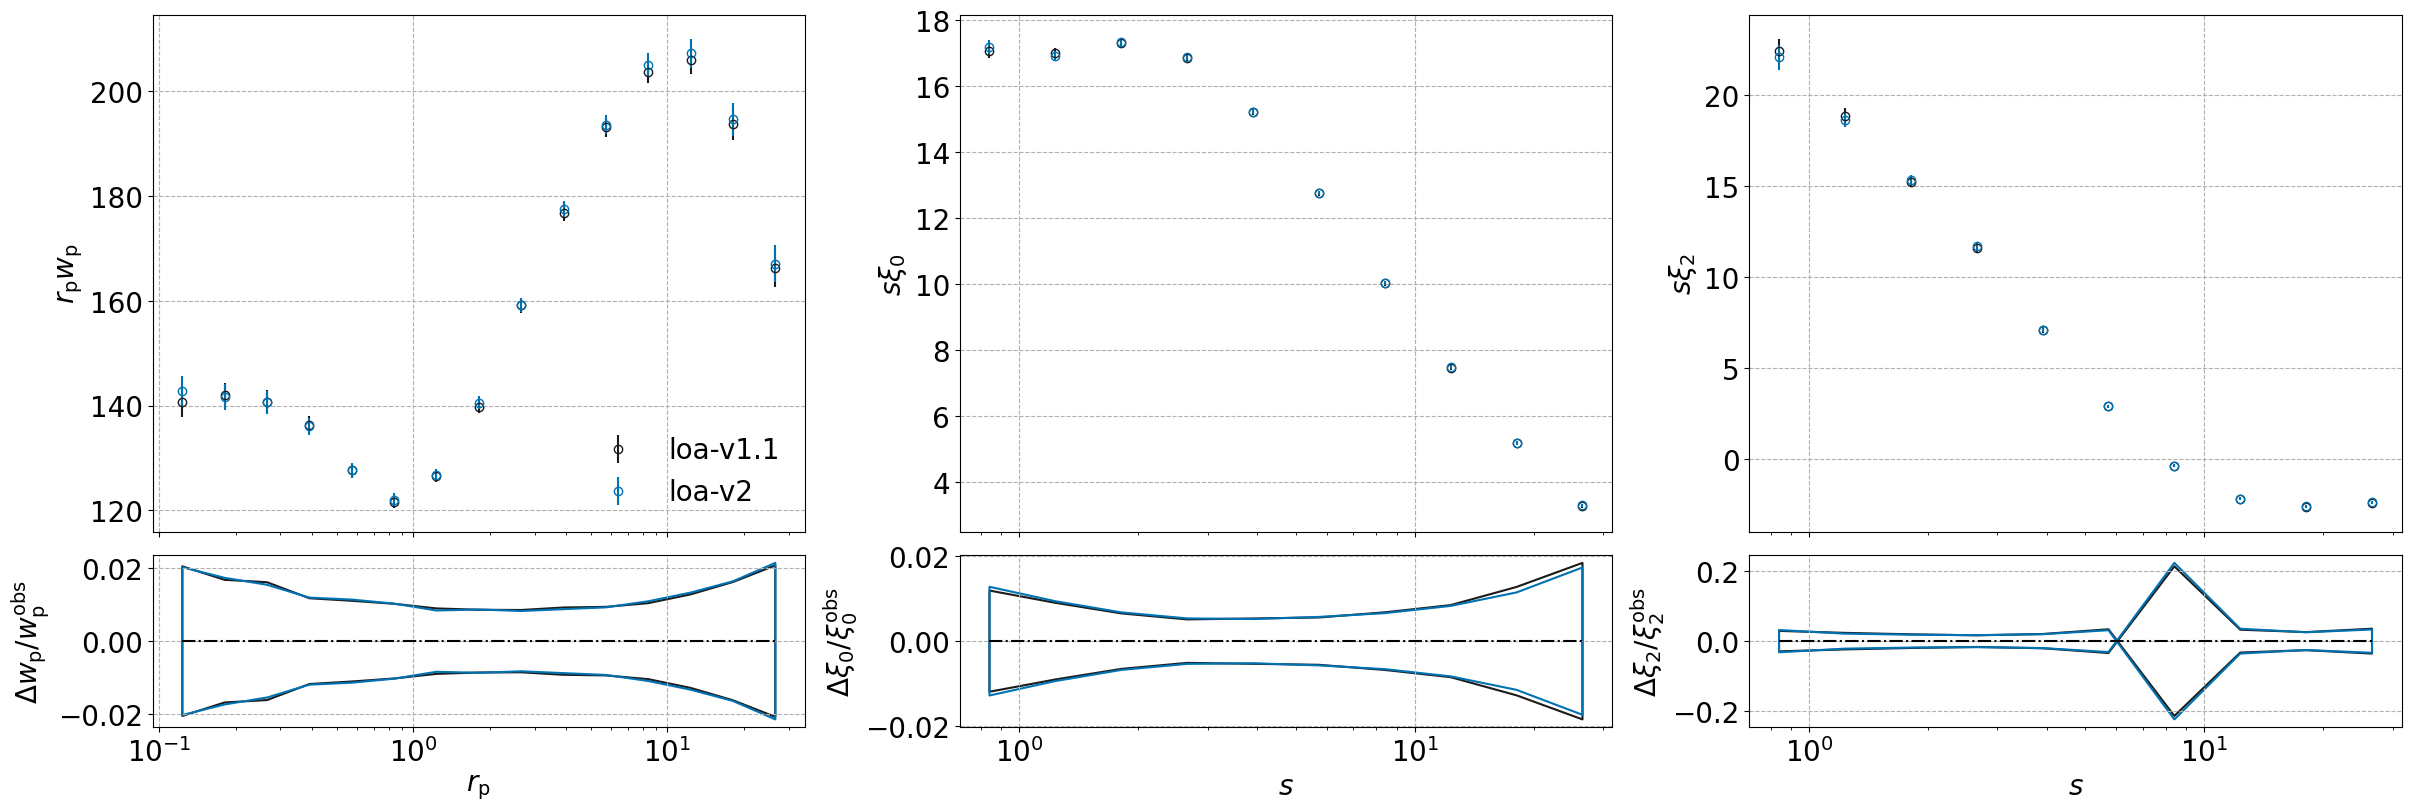

In [5]:
compare_versions('LRG', 0.4, 0.6)

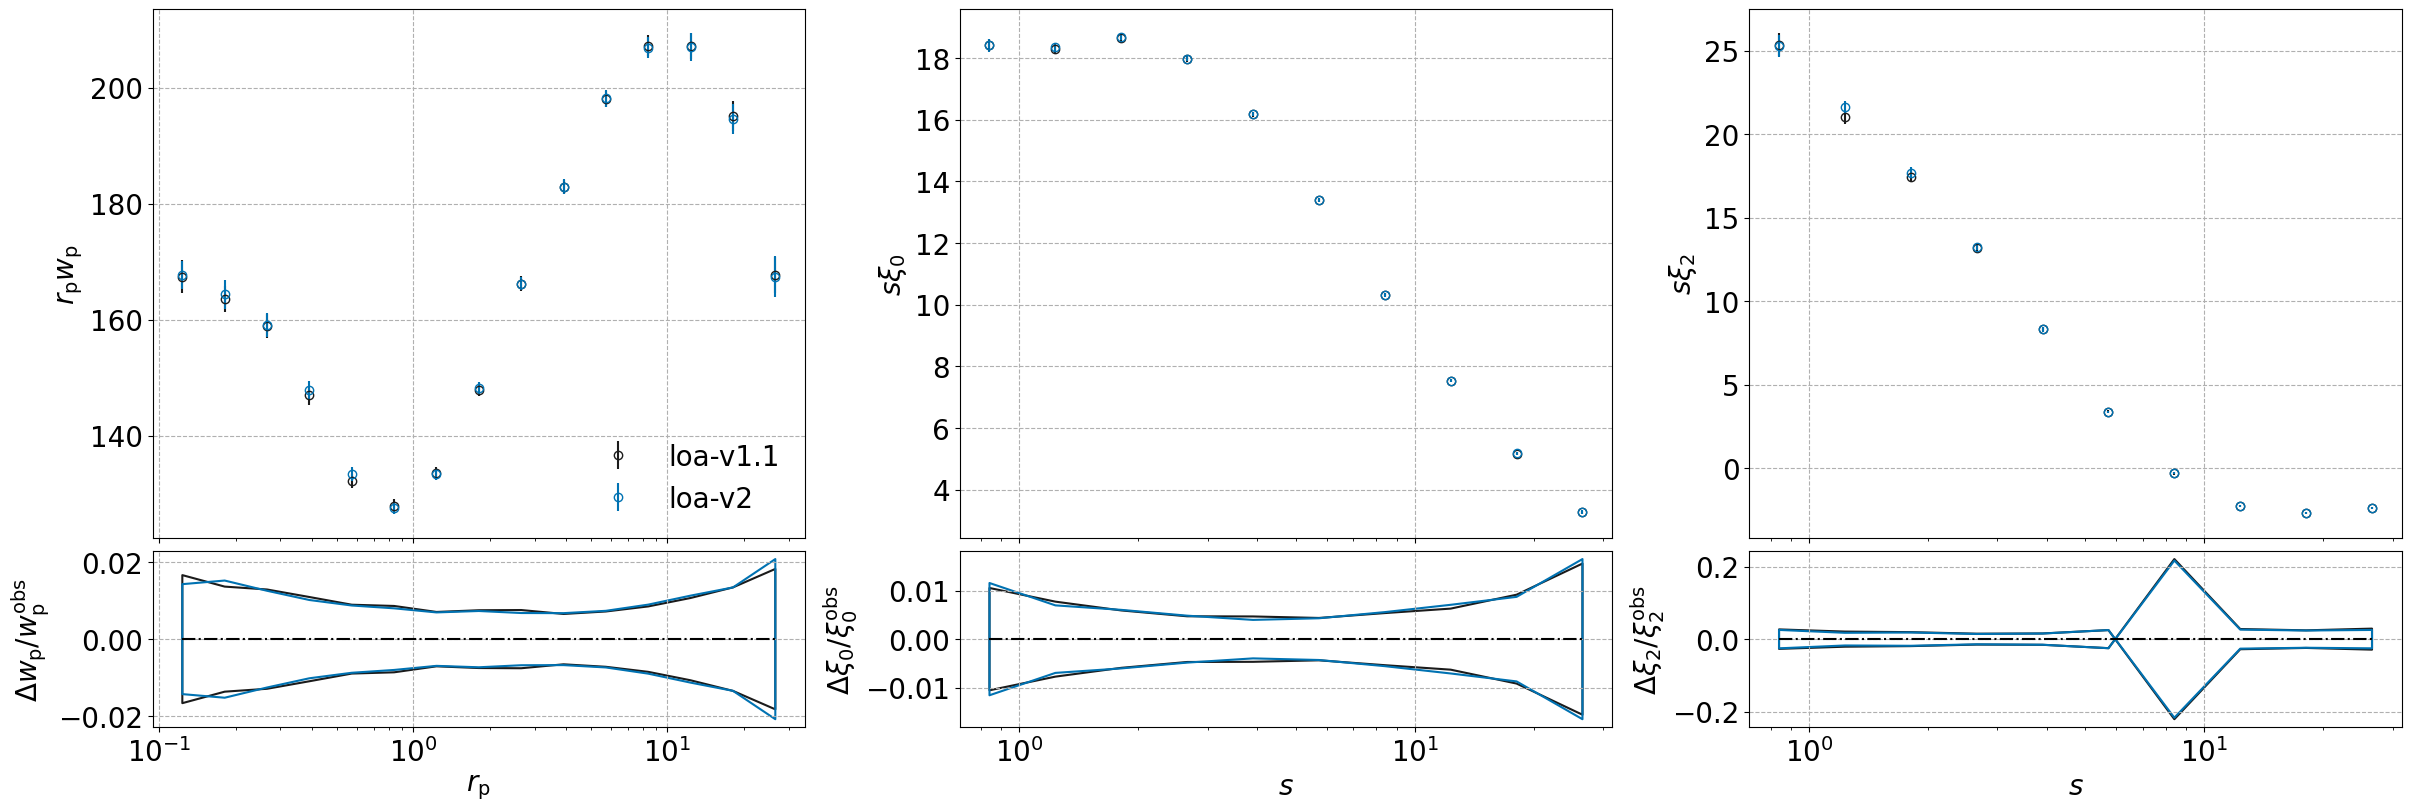

In [6]:
compare_versions('LRG', 0.6, 0.8)

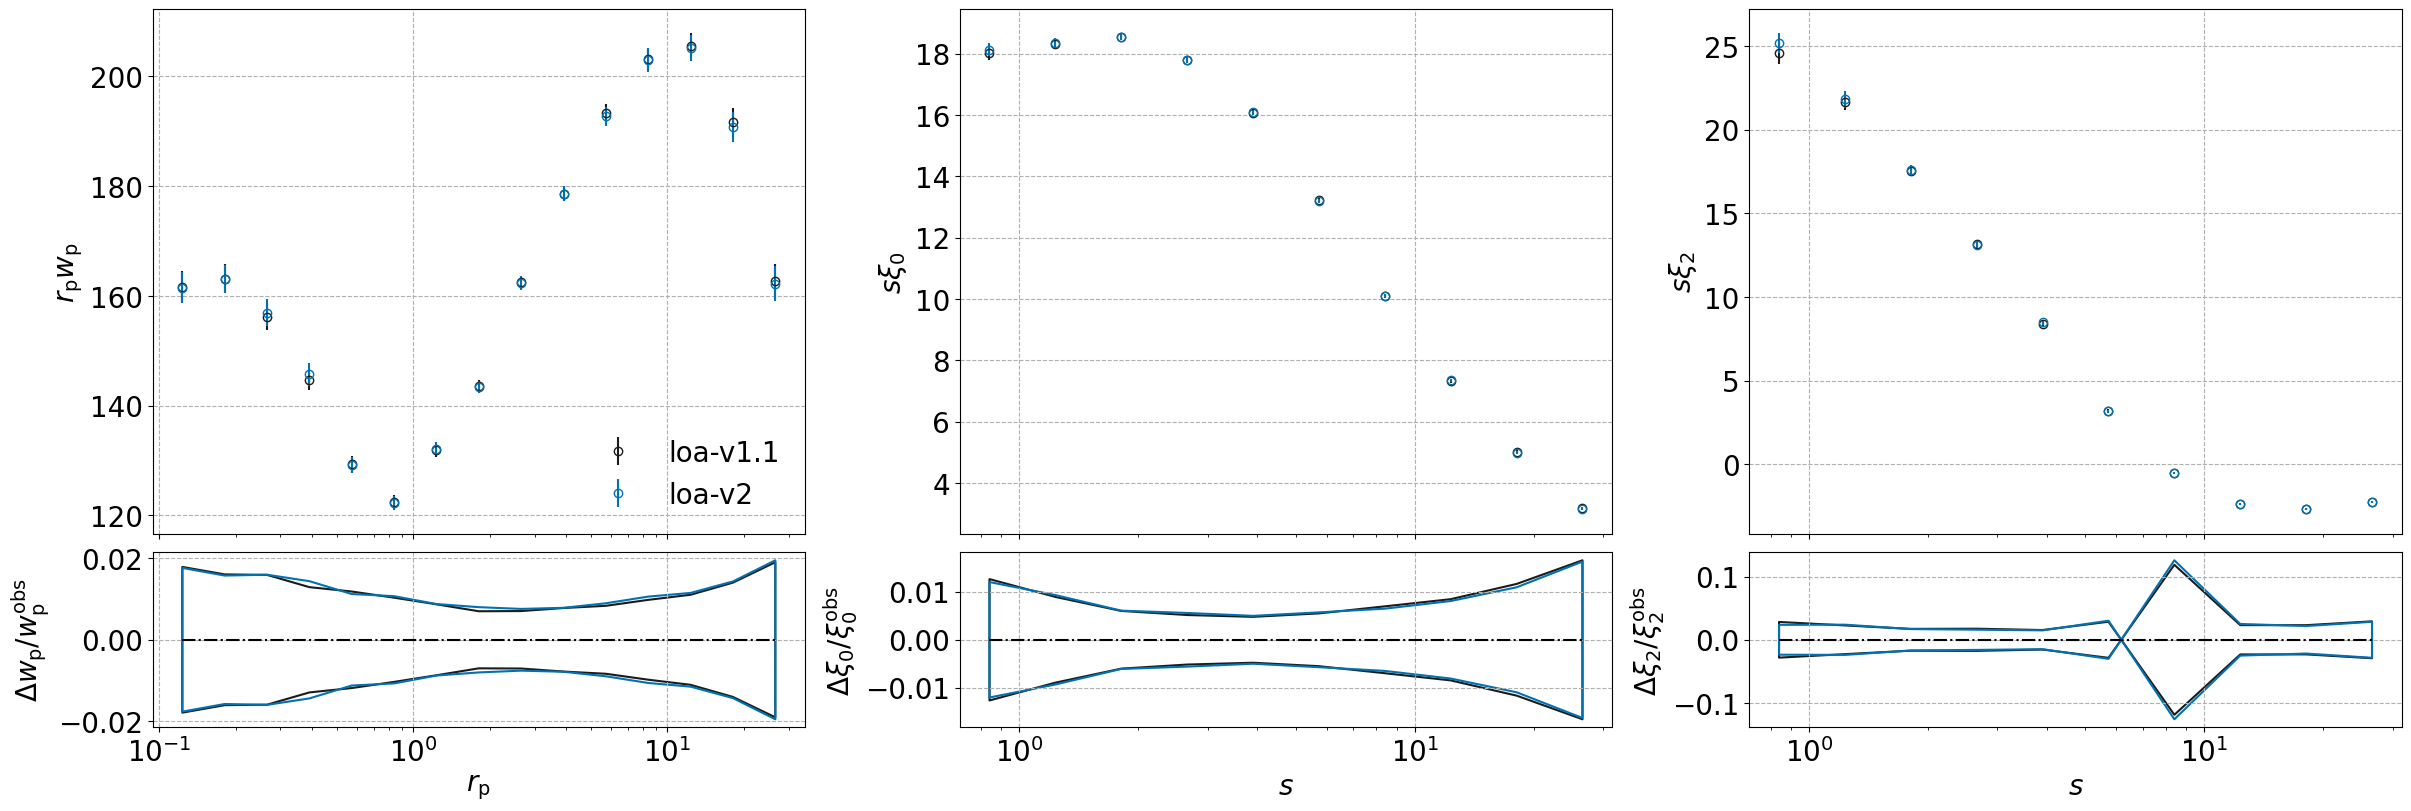

In [7]:
compare_versions('LRG', 0.8, 1.1)

## QSOs

### z1

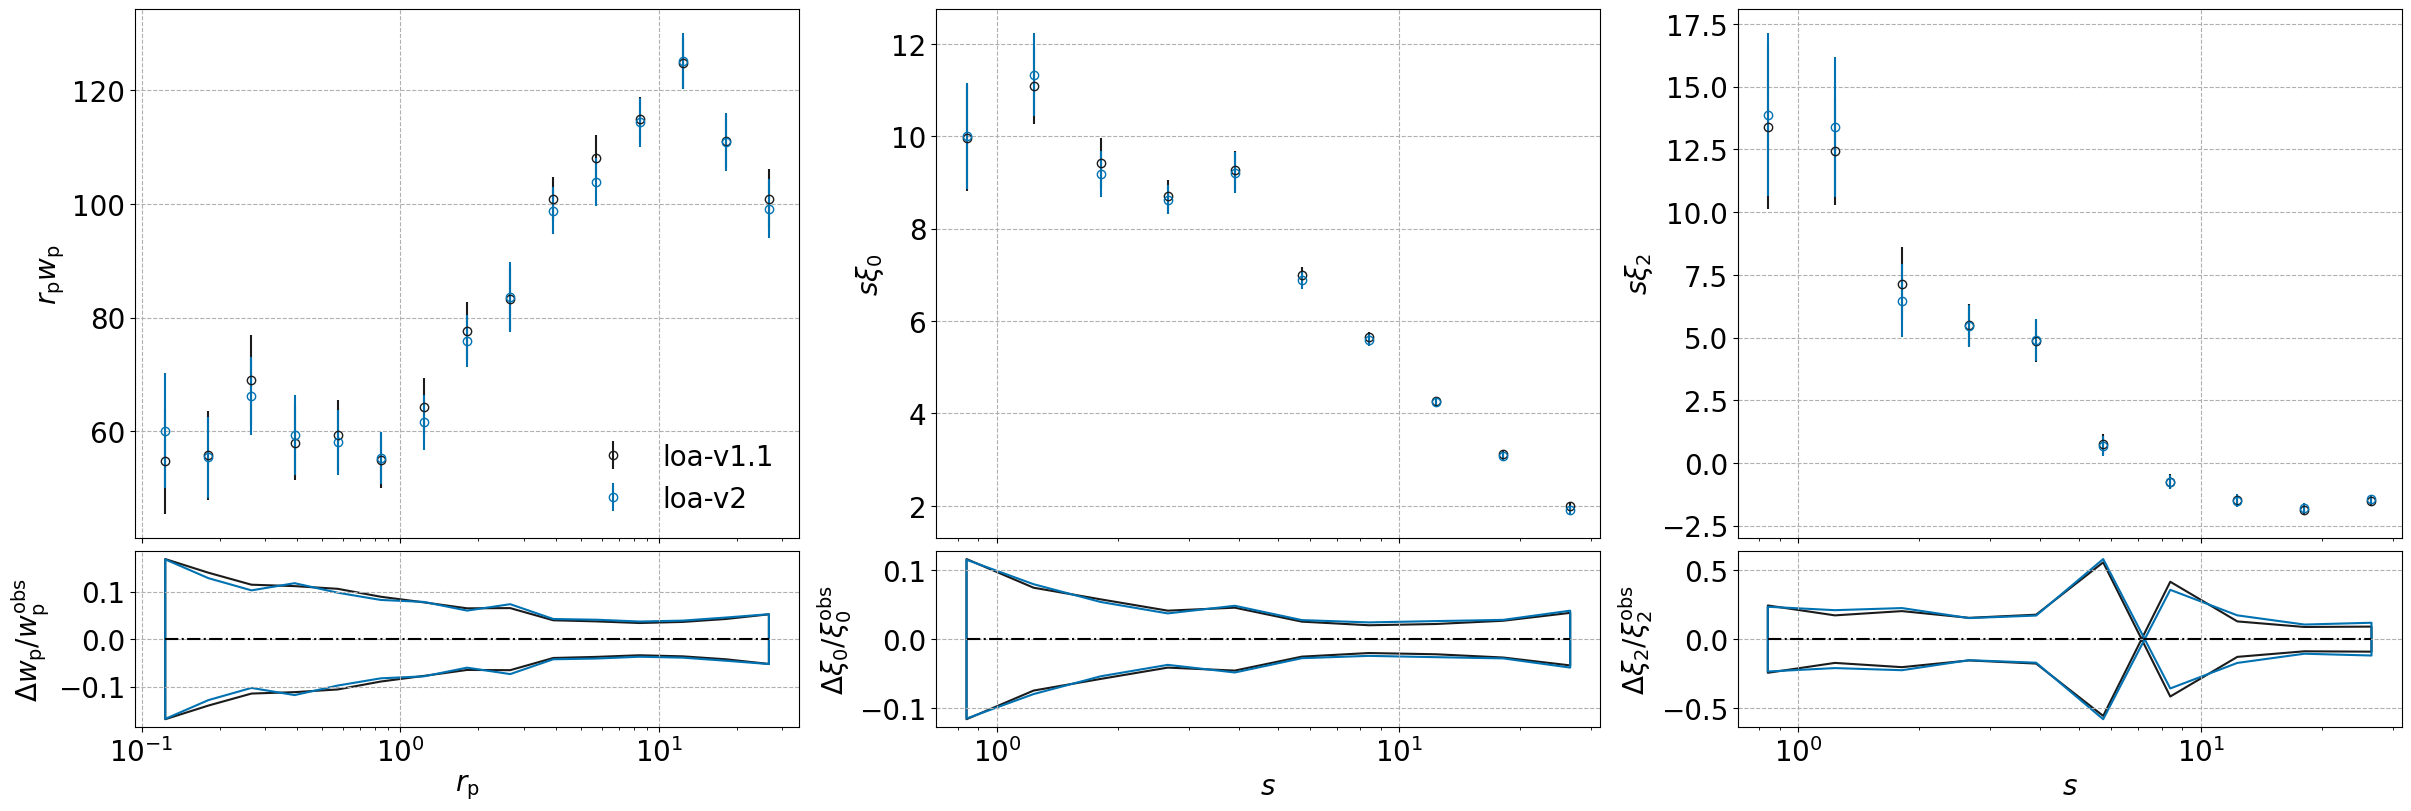

In [8]:
compare_versions('QSO', 0.8, 1.1)

### z2, z3

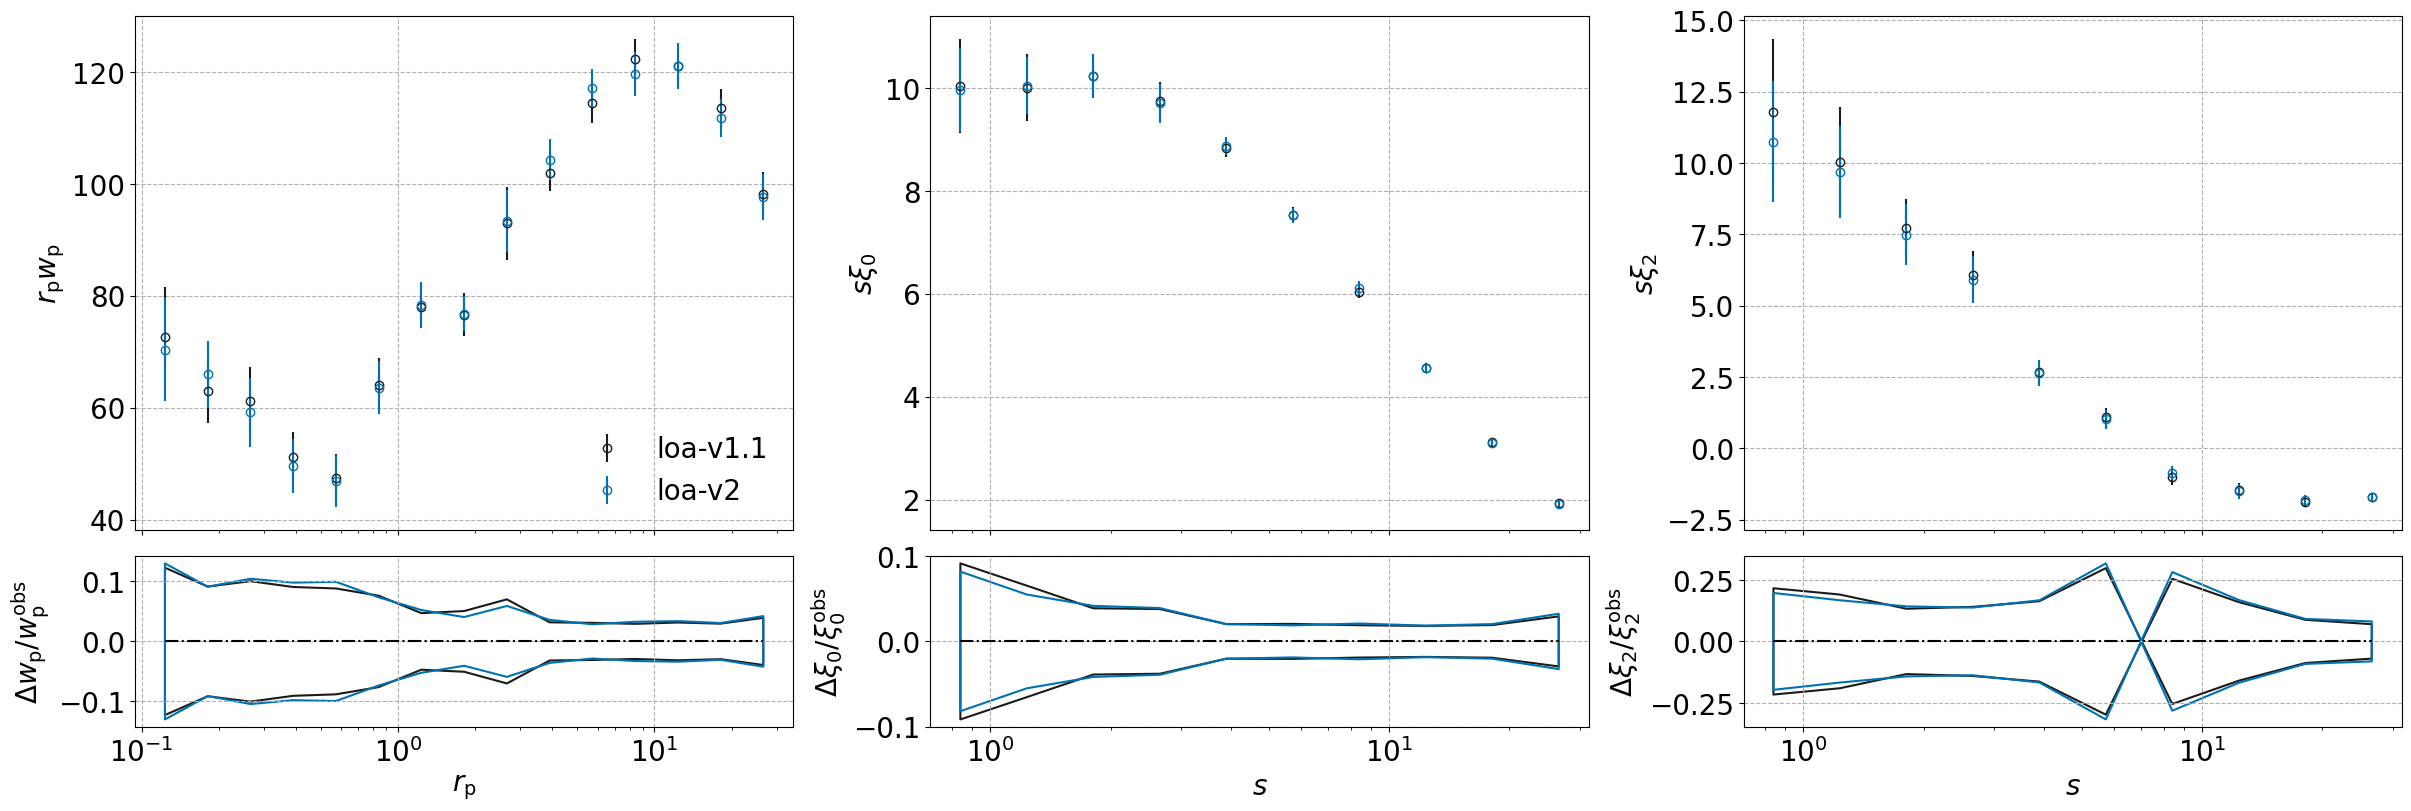

In [9]:
compare_versions('QSO', 1.1, 1.4)

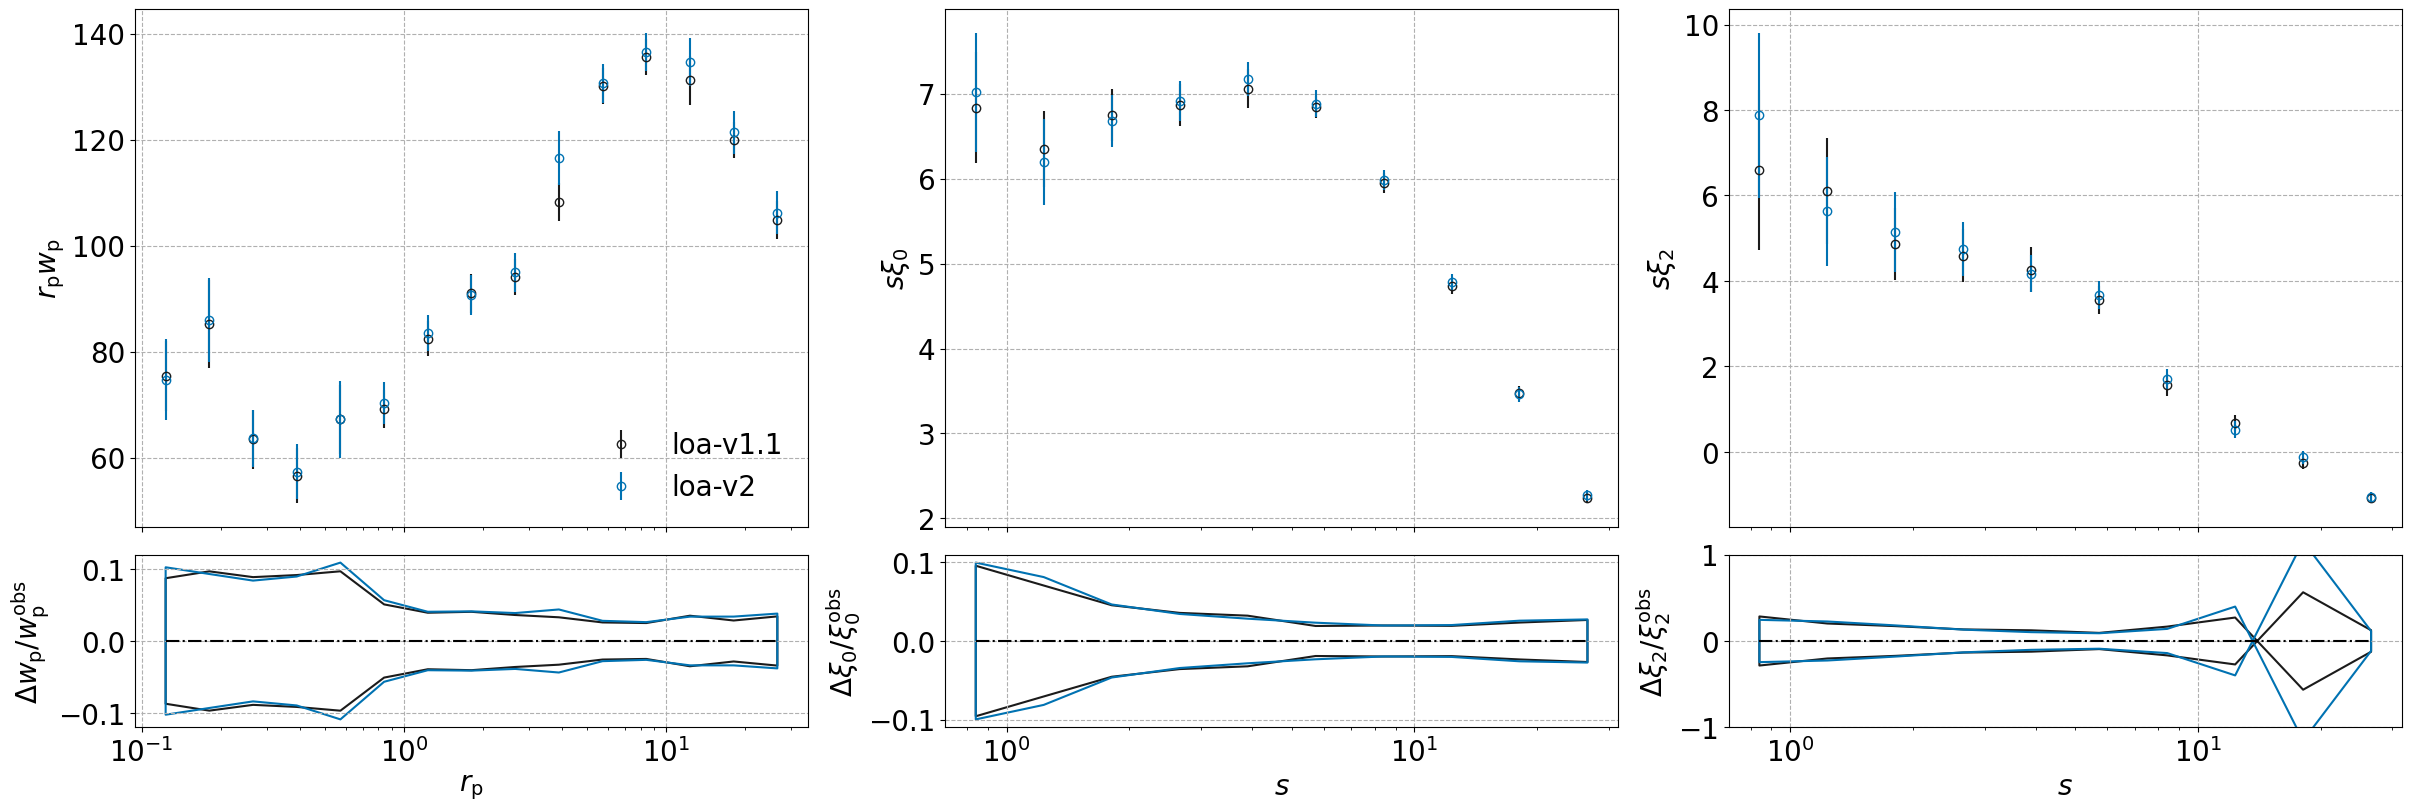

In [10]:
compare_versions('QSO', 1.4, 1.7)

### high-z QSOs: compare between Hanyu's meas and mine

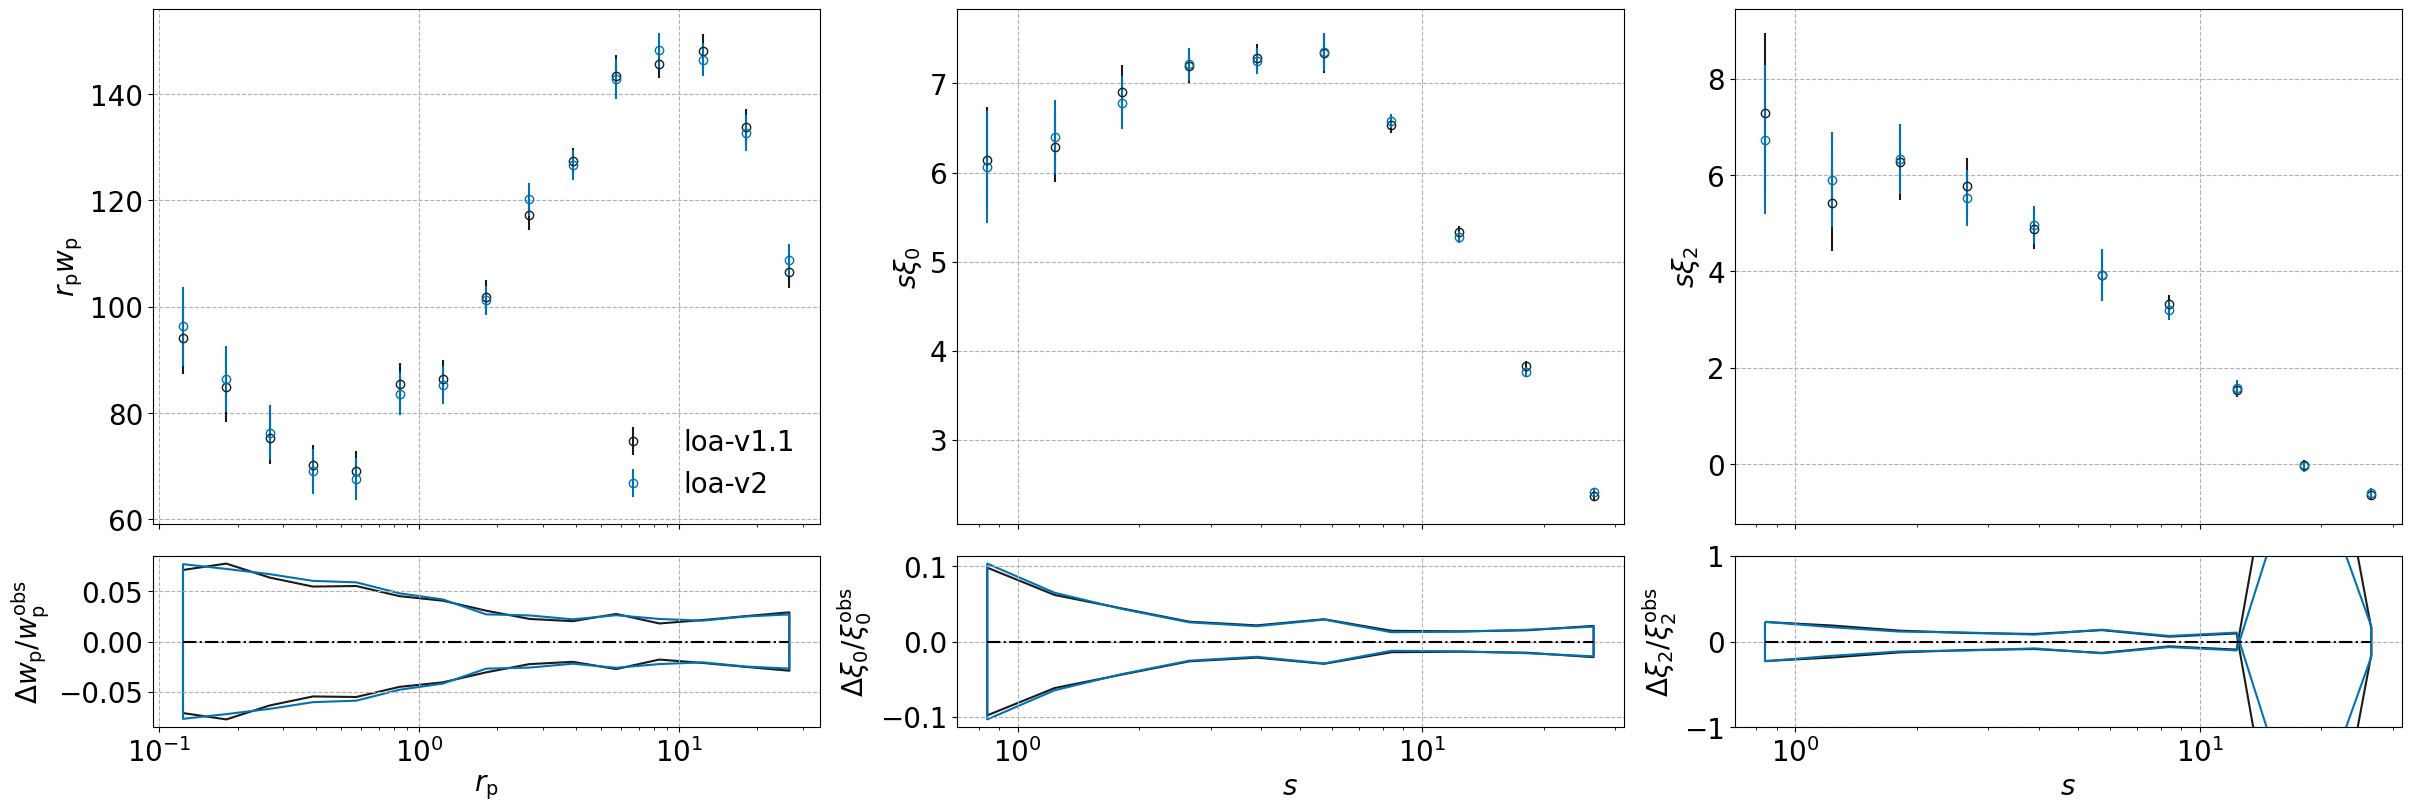

In [11]:
compare_versions('QSO', 1.7, 2.3)

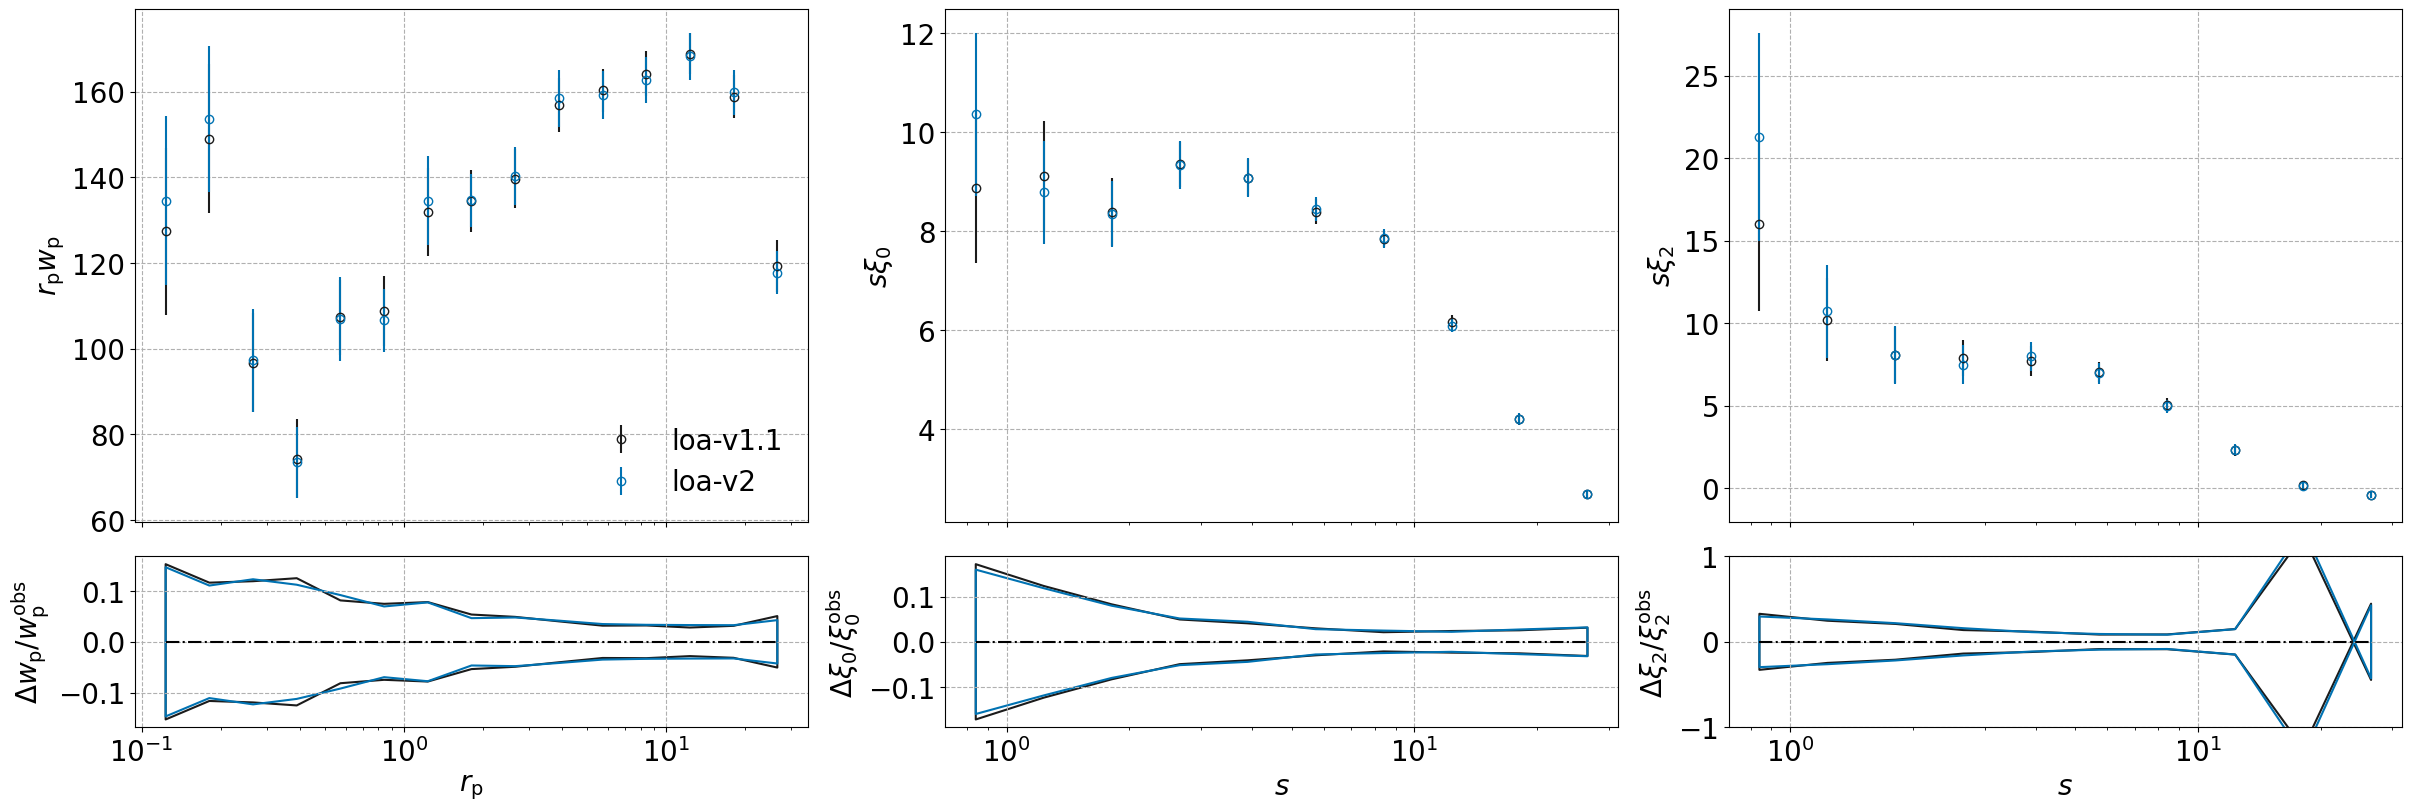

In [12]:
compare_versions('QSO', 2.3, 2.8)

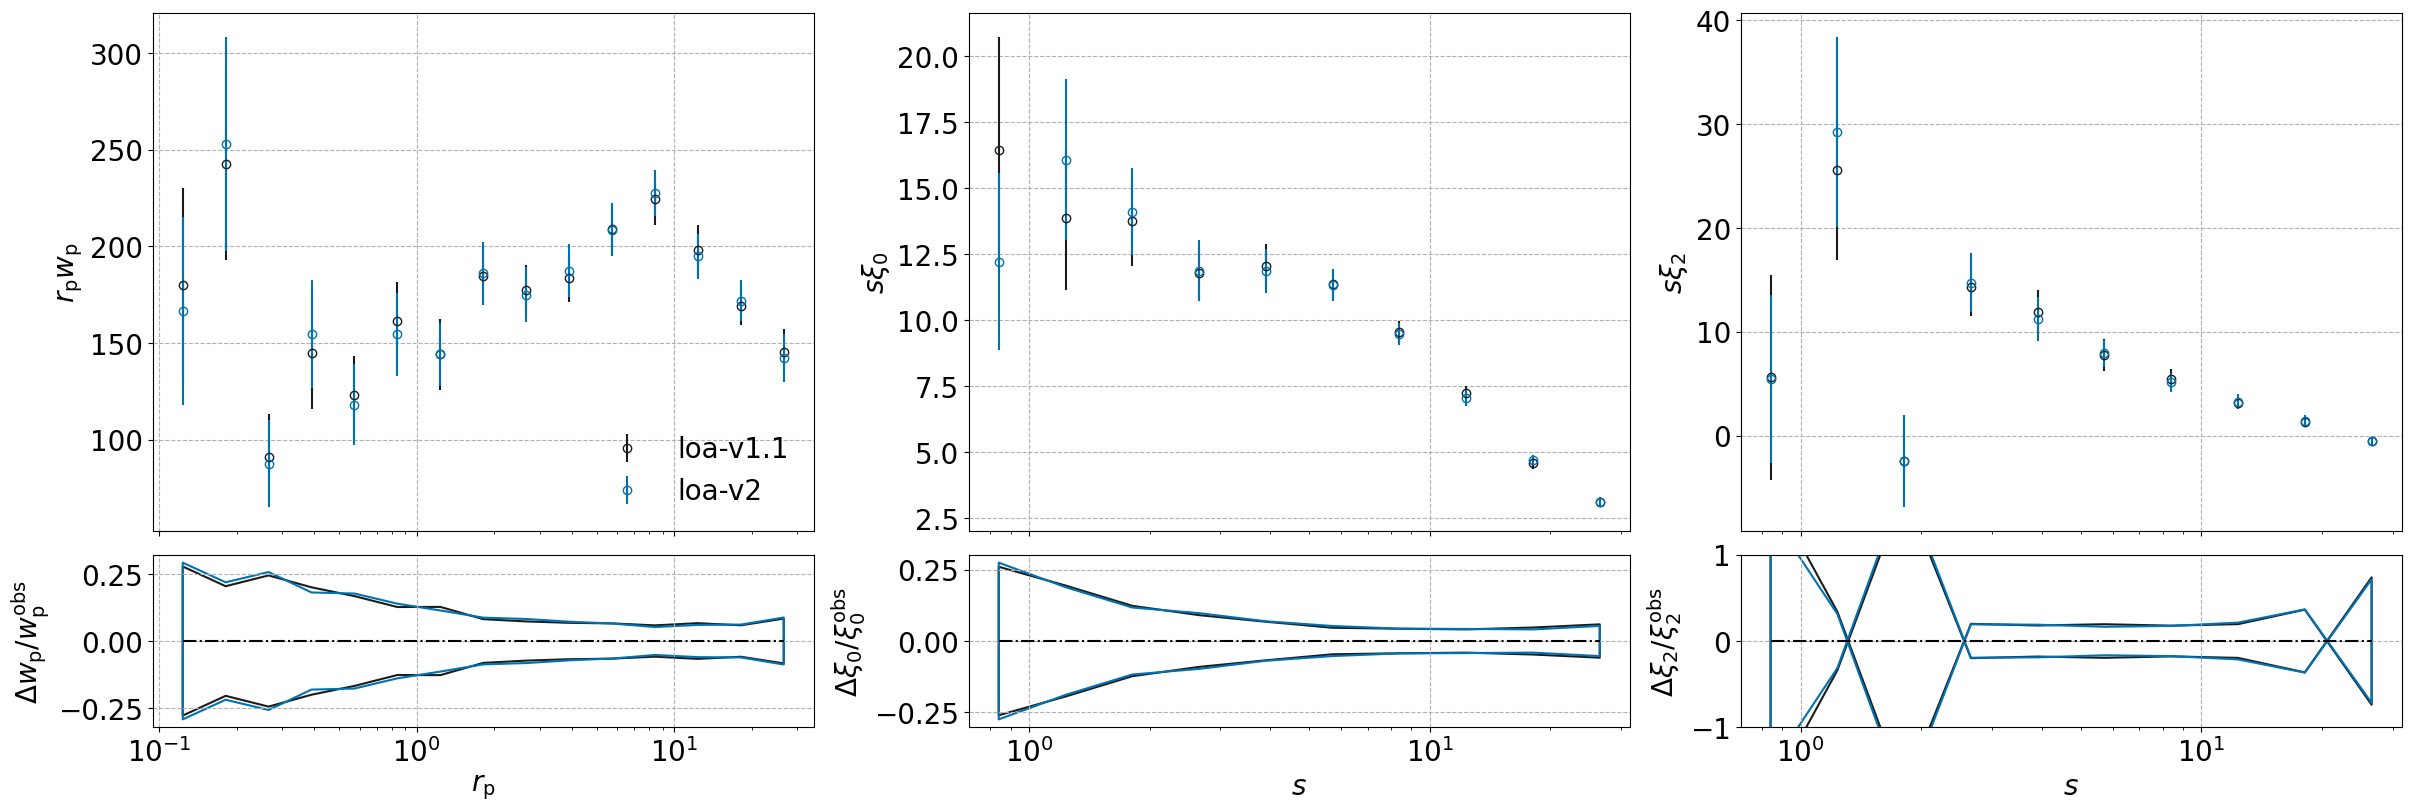

In [13]:
compare_versions('QSO', 2.8, 3.5)